# 분류 모델


기계학습의 분류 모델은 주어진 입력 데이터를 미리 정의된 여러 개의 클래스(카테고리) 중 하나로 분류하는 작업을 수행한다.


분류 모델의 주요 목표는 입력 데이터의 특성을 학습하고, 이를 바탕으로 새로운 데이터가 들어왔을 때 해당 데이터를 올바른 클래스에 배정하는 것이다.


분류 모델은 종속 변수가 범주형일 때 주로 사용되며, 이항 분류(두 개의 클래스)와 다항 분류(세 개 이상의 클래스)를 다룰 수 있다.


**분류 알고리즘**


<table>
    <thead>
        <tr>
            <th>알고리즘</th>
            <th>설명</th>
            <th>특징</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>로지스틱 회귀 <code>sklearn.linear_model.LogisticRegression</code></td>
            <td>선형 회귀의 확장판으로, 종속 변수가 범주형일 때 사용됩니다.</td>
            <td>출력 값은 특정 클래스에 속할 확률로 해석됩니다.</td>
        </tr>
        <tr>
            <td>결정 트리 <code>sklearn.tree.DecisionTreeClassifier</code></td>
            <td>데이터의 속성에 따라 분할하여 학습하는 알고리즘으로, 트리 구조를 통해 분류합니다.</td>
            <td>이해하기 쉽고 해석이 용이합니다.</td>
        </tr>
        <tr>
            <td>서포트 벡터 머신 <code>sklearn.svm.SVC</code></td>
            <td>고차원 공간에서 데이터 포인트를 분리하는 초평면을 찾아내는 알고리즘입니다.</td>
            <td>데이터가 선형적으로 구분되지 않을 경우 커널 트릭을 사용합니다.</td>
        </tr>
        <tr>
            <td>k-최근접 이웃 <code>sklearn.neighbors.KNeighborsClassifier</code></td>
            <td>새로운 데이터 포인트가 주어지면 가장 가까운 k개의 이웃 데이터를 참고하여 분류합니다.</td>
            <td>계산 비용이 높고, 데이터의 크기에 민감합니다.</td>
        </tr>
        <tr>
            <td>나이브 베이즈 <code>sklearn.naive_bayes.GaussianNB</code></td>
            <td>베이즈 정리를 기반으로 하며, 모든 특징이 독립적이라는 가정하에 분류를 수행합니다.</td>
            <td>텍스트 분류에 자주 사용됩니다.</td>
        </tr>
        <tr>
            <td>랜덤 포레스트 <code>sklearn.ensemble.RandomForestClassifier</code></td>
            <td>여러 개의 결정 트리를 앙상블하여 예측 성능을 향상시키는 방법입니다.</td>
            <td>과적합을 방지하고 안정적인 예측을 제공합니다.</td>
        </tr>
        <tr>
            <td>그래디언트 부스팅 <code>sklearn.ensemble.GradientBoostingClassifier</code></td>
            <td>여러 개의 약한 학습기(주로 결정 트리)를 순차적으로 학습하여 강한 예측 모델을 만듭니다.</td>
            <td>XGBoost, LightGBM 등이 대표적입니다.</td>
        </tr>
        <tr>
            <td>가우시안 혼합 모델 <code>sklearn.mixture.GaussianMixture</code></td>
            <td>데이터가 여러 개의 가우시안 분포로 구성되어 있다고 가정하고, EM 알고리즘을 사용하여 파라미터를 추정합니다.</td>
            <td>주로 군집화에 사용됩니다.</td>
        </tr>
        <tr>
            <td>신경망 <code>sklearn.neural_network.MLPClassifier</code></td>
            <td>여러 개의 은닉층을 가지는 다층 퍼셉트론(Multilayer Perceptron, MLP) 등의 구조로, 비선형 문제를 해결하는 데 강력합니다.</td>
            <td>딥러닝의 기초가 됩니다.</td>
        </tr>
    </tbody>
</table>


# LogisticRegression
- 회귀와 Logistic 함수 (sigmoid)를 통해서 분류를 예측하는 모델
- 이진/다중분류 모두 지원
-

## 이진 분류
양성클래스를 예측하는 모델
1. 양성클래스에 대한 회귀식(회귀계수) 계산
2. 확률값 변환(sigmoid함수)
3. 양성클래스 확률값을 통해 음성클래스에 대한 확률 계산

### 로지스틱 함수 (Logistic Function) - 시그모이드 함수
**선형 방정식의 출력을 확률로 변환**해준다. 이 함수는 0과 1 사이의 값을 반환하여 분류 문제에서 이진 분류에 적합하다.


**시그모이드 함수 정의**


$
h(z) = \frac{1}{1 + e^{-z}}
$


여기서 $ z $는 입력값으로, 선형 방정식의 결과물이다.


![](https://d.pr/i/tTdKdt+)


**시그모이드 함수의 특징**
- 출력 값은 항상 0과 1 사이이다.
- $ z \to \infty $ 일 때, $ h(z) \to 1 $
- $ z \to -\infty $ 일 때, $ h(z) \to 0 $


**역할**
- **로지스틱 회귀**에서는 선형 결합을 시그모이드 함수에 넣어 0과 1 사이의 값을 얻고, 이를 확률로 해석한다.
- 이 값을 기준으로, 분류 문제에서 **0.5** 이상이면 클래스 1로, 그 미만이면 클래스 0으로 분류한다.


**정리**
1. 선형회귀 결과값(z) 계산
2. 시그모이드 함수에 z를 넣어 양성에 대한 확률값 계산
4. 0일때 확률도 마저 계산
3. 0.5를 기준으로 이진분류(0, 1) 수행


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

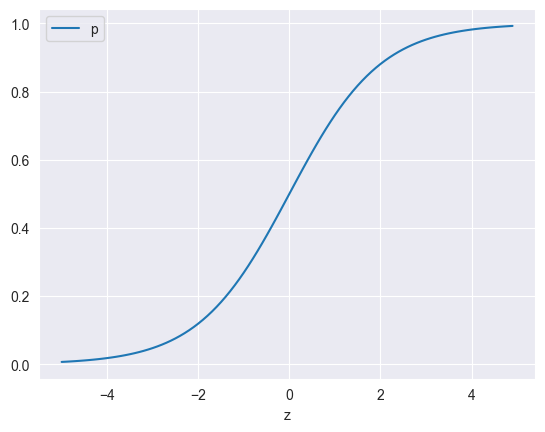

In [5]:
# 시그모이드 함수
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

z = np.arange(-5, 5, 0.1)
p = sigmoid(z) # 0~1 사이의 확률값

df = pd.DataFrame({'z': z, 'p': p})


df.plot(x='z', y='p')
plt.show()


In [6]:
# 생선 이진분류
fish_df = pd.read_csv('data/fish.csv')
fish_df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [8]:
is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
fish_df = fish_df[is_bream_or_smelt]
fish_df['Species'].value_counts()

fish_df # 정답까지 붙어있으니까 쪼개줘야함.

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [10]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# 학습 / 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

print('학습셋 Accuracy : ', lr_clf.score(X_train_scaled, y_train))
print('평가셋 Accuracy : ', lr_clf.score(X_test_scaled, y_test))

학습셋 Accuracy :  1.0
평가셋 Accuracy :  1.0


In [19]:
# 확률값(p) 확인
print(lr_clf.classes_) # ['Bream', 'Smelt']

y_pred = lr_clf.predict(X_test_scaled[:3])
print(y_pred)

y_pred_proba = lr_clf.predict_proba(X_test_scaled[:3])
y_pred_proba

# 학습된 회귀계수 / 절편
print('coef :', lr_clf.coef_) # 데이터당 특성이 5개니까 5개 나옴
print('intercept :', lr_clf.intercept_) # 절편은 항상 하나


# 회귀식 결과값 (z) : 양성 클래스에 대한 회귀식
z = lr_clf.decision_function(X_test_scaled[:3])
print("회귀식 결과값(z) :", z)
print('양성 확률값:', sigmoid(z))
print('음성 확률값:', 1 - sigmoid(z))


['Bream' 'Smelt']
['Bream' 'Bream' 'Smelt']
coef : [[-0.57089591 -0.80002209 -0.83364179 -0.86805125 -0.81749383]]
intercept : [-2.68396424]
회귀식 결과값(z) : [-4.69762116 -5.16549188  2.94468638]
양성 확률값: [0.00903457 0.00567783 0.95001175]
음성 확률값: [0.99096543 0.99432217 0.04998825]
